In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings
filterwarnings ('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv(r"C:\Users\Sneha Vijay\Downloads\virtual intern\OIBSIP\CarPrice_Assignment.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
#outliers

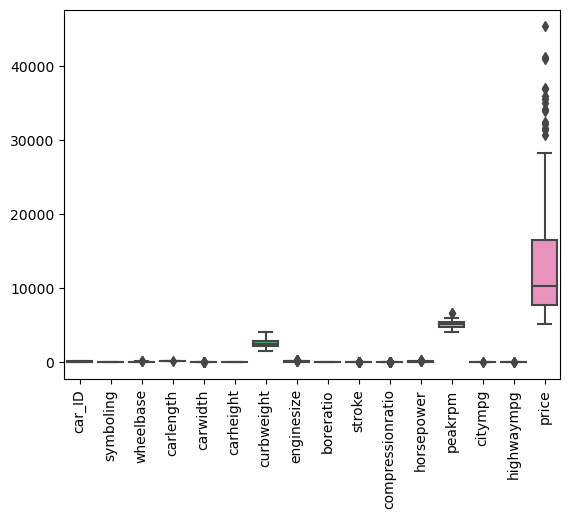

In [9]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [10]:
#there are so many outliers in the data

In [11]:
#missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
#there is no missing value present in the data set

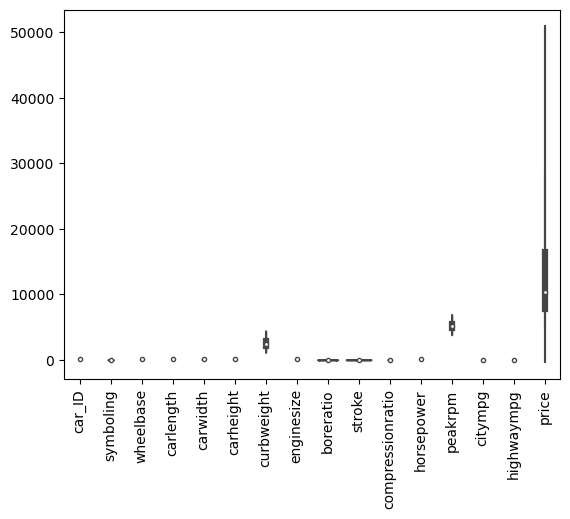

In [15]:
#violin plot
sns.violinplot(df)
plt.xticks(rotation=90)
plt.show()

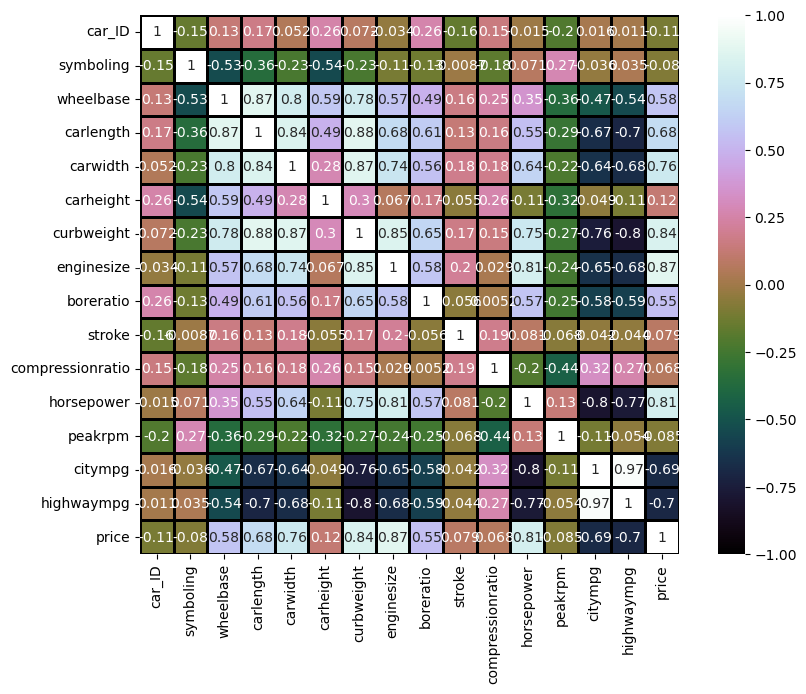

In [21]:
#Heat Maps
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(df.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [25]:
#normality of data
from scipy import stats

alpha = 0.05

for i in df.select_dtypes(np.number).columns:
    _, p_value = stats.shapiro(df[i])
    
    if p_value < alpha:
        print(f"Reject H0 for column {i}: Data is not normal")
    else:
        print(f"Failed to reject H0 for column {i}: Data is normal")



Reject H0 for column car_ID: Data is not normal
Reject H0 for column symboling: Data is not normal
Reject H0 for column wheelbase: Data is not normal
Reject H0 for column carlength: Data is not normal
Reject H0 for column carwidth: Data is not normal
Reject H0 for column carheight: Data is not normal
Reject H0 for column curbweight: Data is not normal
Reject H0 for column enginesize: Data is not normal
Reject H0 for column boreratio: Data is not normal
Reject H0 for column stroke: Data is not normal
Reject H0 for column compressionratio: Data is not normal
Reject H0 for column horsepower: Data is not normal
Reject H0 for column peakrpm: Data is not normal
Reject H0 for column citympg: Data is not normal
Reject H0 for column highwaympg: Data is not normal
Reject H0 for column price: Data is not normal


In [27]:
newdf=df.copy()

In [30]:
newdf.drop("price",axis=1,inplace=True)

In [32]:
import pandas as pd
from scipy.stats import chi2_contingency

alpha = 0.05

for i in newdf.columns:
  
    observed = pd.crosstab(newdf[i], df["price"])

    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(observed)

    if p < alpha:
        print(f"Reject H0 for column {i}: No relationship between {i} and price")
    else:
        print(f"Failed to reject H0 for column {i}: There is a significant relationship between {i} and price")

    



Failed to reject H0 for column car_ID: There is a significant relationship between car_ID and price
Failed to reject H0 for column symboling: There is a significant relationship between symboling and price
Failed to reject H0 for column CarName: There is a significant relationship between CarName and price
Failed to reject H0 for column fueltype: There is a significant relationship between fueltype and price
Failed to reject H0 for column aspiration: There is a significant relationship between aspiration and price
Failed to reject H0 for column doornumber: There is a significant relationship between doornumber and price
Failed to reject H0 for column carbody: There is a significant relationship between carbody and price
Failed to reject H0 for column drivewheel: There is a significant relationship between drivewheel and price
Failed to reject H0 for column enginelocation: There is a significant relationship between enginelocation and price
Reject H0 for column wheelbase: No relationshi

# TRAIN TEST SPLIT WITH ENCODING AND SCALING

In [41]:
#encoding

In [42]:
x=newdf

In [43]:
x_encod=pd.get_dummies(x,drop_first=True)

In [44]:
ss=StandardScaler()

In [45]:
x_scale=pd.DataFrame(ss.fit_transform(x_encod),index=x_encod.index,columns=x_encod.columns)

In [46]:
x_scale

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.723622,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
1,-1.706724,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
2,-1.689826,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
3,-1.672928,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
4,-1.656029,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.656029,-1.476452,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
201,1.672928,-1.476452,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
202,1.689826,-1.476452,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
203,1.706724,-1.476452,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,3.041381,-0.070014,-0.920243,-0.214286,-0.070014


In [47]:
y=df["price"]

In [49]:
x_c=sm.add_constant(x_scale)

# MODEL BULIDING

In [50]:
model=sm.OLS(y,x_c).fit()

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     60.35
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           6.35e-19
Time:                        21:14:33   Log-Likelihood:                -1514.8
No. Observations:                 205   AIC:                             3388.
Df Residuals:                      26   BIC:                             3982.
Df Model:                         178                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    1.328e+04     76.796    172.883      0.000    1.31e+04    1.34e+04
car_ID                                   9058.6722   3827.834      2.367      0.026    1190.446    1.69e+04
symboling                                 901.4722    402.108      2.242      0.034      74.926    1728.018
wheelbase                                1740.9588    771.979      2.255      0.033     154.134    3327.784
carlength                               -2756.3494    929.452     -2.966      0.006   -4666.865    -845.834
carwidth                                 1514.8378    656.364      2.308      0.029     165.662    2864.014
carheight                               -1125.7465    663.639     -1.696      0.102   -2489.875     238.382
curbweight                               5634.1991   1763.602      3.195      0.004    2009.063    9259.335
enginesize                               2306.8575   2095.493      1.101      0.281   -2000.489    6614.204
boreratio                                -941.4788    484.351     -1.944      0.063   -1937.077      54.119
stroke                                   -411.2658    335.616     -1.225      0.231   -1101.134     278.603
compressionratio                        -7568.9036   3060.606     -2.473      0.020   -1.39e+04   -1277.737
horsepower                              -1691.3718   1341.622     -1.261      0.219   -4449.115    1066.372
peakrpm                                  1563.3208    479.466      3.261      0.003     577.764    2548.878
citympg                                  2018.5272   1456.709      1.386      0.178    -975.780    5012.835
highwaympg                               -853.3331   1127.072     -0.757      0.456   -3170.063    1463.397
CarName_alfa-romero Quadrifoglio         1306.5723    471.857      2.769      0.010     336.655    2276.489
CarName_alfa-romero giulia                835.8550    496.660      1.683      0.104    -185.045    1856.755
CarName_alfa-romero stelvio              1034.5556    492.547      2.100      0.046      22.112    2047.000
CarName_audi 100 ls                      1211.8703    444.350      2.727      0.011     298.496    2125.245
CarName_audi 100ls                        765.0088    450.391      1.699      0.101    -160.783    1690.801
CarName_audi 4000                         821.8309    316.174      2.599      0.015     171.925    1471.736
CarName_audi 5000                         672.8894    308.399      2.182      0.038      38.967    1306.812
CarName_audi 5000s (diesel)               514.9459    314.265      1.639      0.113    -131.034    1160.926
CarName_audi fox                          720.8873    292.060      2.468      0.020     120.549    1321.226
CarName_bmw 320i                         1678.6939    612.1

In [53]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [54]:
lr=LinearRegression()
sfs_forward=sfs(estimator=lr,k_features="best",forward=True,verbose=2,scoring="neg_root_mean_squared_error")

In [61]:
rfr=RandomForestRegressor(random_state=0)
rfr.fit(x_c,y)
ypred=rfr.predict(x_c)
mean_squared_error(y,ypred,squared=False)
print("r2_score",r2_score(y,ypred))

r2_score 0.9906997151038252


In [64]:
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(x_c,y)
ypred=dtr.predict(x_c)
print(mean_squared_error(y,ypred,squared=False))
important_features = pd.DataFrame({'Features': x_c.columns, 
                                   'Importance': dtr.feature_importances_})
print(important_features.sort_values('Importance', ascending = False))
print("r2_score",r2_score(y,ypred))

0.0
                       Features  Importance
8                    enginesize    0.668153
7                    curbweight    0.225760
1                        car_ID    0.022668
15                   highwaympg    0.018450
5                      carwidth    0.015051
..                          ...         ...
82   CarName_mitsubishi montero    0.000000
86          CarName_nissan dayz    0.000000
87          CarName_nissan fuga    0.000000
88          CarName_nissan gt-r    0.000000
190             fuelsystem_spfi    0.000000

[191 rows x 2 columns]
r2_score 1.0


In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scale,y,test_size=0.3,random_state=0)

In [67]:
lr=LinearRegression()
model_lr=lr.fit(xtrain,ytrain)
y_pred_train=model_lr.predict(xtrain)
y_pred_test=model_lr.predict(xtest)
print("rmse_train",mean_squared_error(ytrain,y_pred_train,squared=False))
print("rmse_test",mean_squared_error(ytest,y_pred_test,squared=False))
print("r2_score",r2_score(ytest,y_pred_test))

rmse_train 165.12111211791162
rmse_test 1.3765065245506712e+16
r2_score -2.8692393383944163e+24


In [70]:
knnr=KNeighborsRegressor()
model_knnr=knnr.fit(xtrain,ytrain)
y_pred_train=model_knnr.predict(xtrain)
y_pred_test=model_knnr.predict(xtest)
print("rmse_train",mean_squared_error(ytrain,y_pred_train,squared=False))
print("rmse_test",mean_squared_error(ytest,y_pred_test,squared=False))
print("r2_score",r2_score(ytest,y_pred_test))

rmse_train 5381.3792654151985
rmse_test 7617.181692673054
r2_score 0.12138450533430745


In [71]:
dt=DecisionTreeRegressor(random_state=0)
model_dt=dt.fit(xtrain,ytrain)
y_pred_train=model_dt.predict(xtrain)
y_pred_test=model_dt.predict(xtest)
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': model_dt.feature_importances_})
print(important_features.sort_values('Importance', ascending = False),"\n")
print("rmse_train",mean_squared_error(ytrain,y_pred_train,squared=False))
print("rmse_test",mean_squared_error(ytest,y_pred_test,squared=False))
print("r2_score",r2_score(ytest,y_pred_test))

                         Features  Importance
7                      enginesize    0.697799
6                      curbweight    0.203730
0                          car_ID    0.027572
12                        peakrpm    0.018685
29                 CarName_bmw z4    0.009604
..                            ...         ...
79      CarName_mitsubishi mirage    0.000000
80   CarName_mitsubishi mirage g4    0.000000
81     CarName_mitsubishi montero    0.000000
82   CarName_mitsubishi outlander    0.000000
189               fuelsystem_spfi    0.000000

[190 rows x 2 columns] 

rmse_train 0.0
rmse_test 2848.699280854674
r2_score 0.8771137080024609


In [72]:
rf=RandomForestRegressor(random_state=0)
model_rf=rf.fit(xtrain,ytrain)
y_pred_train=model_rf.predict(xtrain)
y_pred_test=model_rf.predict(xtest)
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': model_rf.feature_importances_})
print(important_features.sort_values('Importance', ascending = False),"\n")
print("rmse_train",mean_squared_error(ytrain,y_pred_train,squared=False))
print("rmse_test",mean_squared_error(ytest,y_pred_test,squared=False))
print("r2_score",r2_score(ytest,y_pred_test))

                      Features  Importance
7                   enginesize    0.669344
6                   curbweight    0.175067
14                  highwaympg    0.032048
0                       car_ID    0.022243
11                  horsepower    0.018537
..                         ...         ...
48   CarName_dodge monaco (sw)    0.000000
70    CarName_mazda glc custom    0.000000
159          CarName_vw dasher    0.000000
87         CarName_nissan gt-r    0.000000
96        CarName_nissan teana    0.000000

[190 rows x 2 columns] 

rmse_train 785.3855425277688
rmse_test 2527.3897816310855
r2_score 0.9032714497726181


In [73]:
abr=AdaBoostRegressor(estimator=rf, random_state=0)
model_abr=abr.fit(xtrain,ytrain)
y_pred_train=model_abr.predict(xtrain)
y_pred_test=model_abr.predict(xtest)
print("rmse_train",mean_squared_error(ytrain,y_pred_train,squared=False))
print("rmse_test",mean_squared_error(ytest,y_pred_test,squared=False))
print("r2_score",r2_score(ytest,y_pred_test))

rmse_train 488.22518035758543
rmse_test 2437.2133850093246
r2_score 0.9100507933610295


In [74]:
gbr=GradientBoostingRegressor(random_state=0)
model_gbr=gbr.fit(xtrain,ytrain)
y_pred_train=model_gbr.predict(xtrain)
y_pred_test=model_gbr.predict(xtest)
print("rmse_train",mean_squared_error(ytrain,y_pred_train,squared=False))
print("rmse_test",mean_squared_error(ytest,y_pred_test,squared=False))
print("r2_score",r2_score(ytest,y_pred_test))

rmse_train 591.4250526543995
rmse_test 2453.509329229828
r2_score 0.9088439169521381
